In [1]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Parte 1

Coordenadas cromaticas

In [2]:
def rbg_to_chromatic_coord(img: np.ndarray) -> np.ndarray:
    sum_rgb = np.sum(img, axis=2)
    # Reshape to be able to use broadcasting
    sum_rgb = sum_rgb.reshape((*sum_rgb.shape, 1))
    # We create an empty matrix in the same img shape with floats
    result = np.zeros(img.shape)
    result = np.where(sum_rgb != 0, img / sum_rgb, 0)
    # We convert to uint8 again
    return (result * 255).astype(np.uint8)

C:\Users\andre\AppData\Local\Temp\ipykernel_32608\3642249952.py:7: RuntimeWarning: invalid value encountered in divide
  result = np.where(sum_rgb != 0, img / sum_rgb, 0)


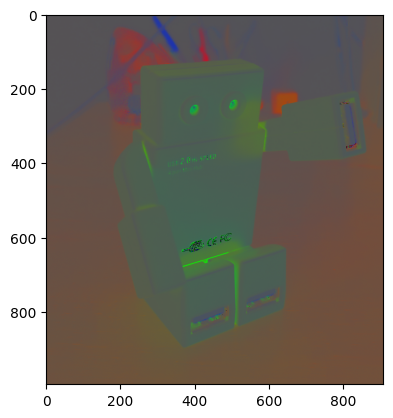

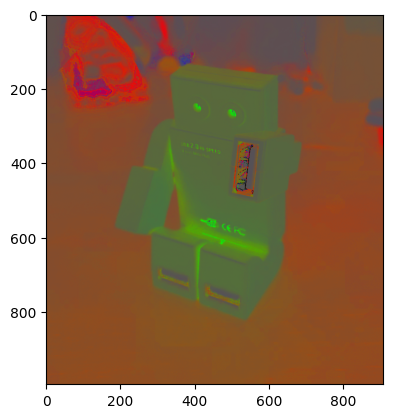

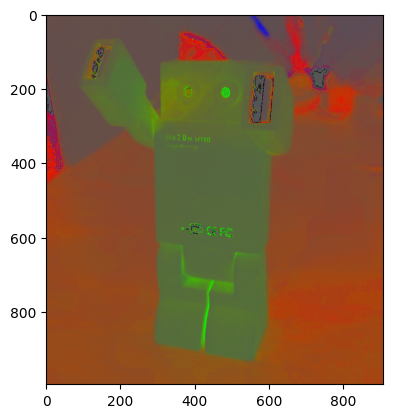

In [3]:
image_paths = ['assets\coord_cromaticas\CoordCrom_1.png','assets\coord_cromaticas\CoordCrom_2.png', 'assets\coord_cromaticas\CoordCrom_3.png']

images = [cv.imread(path) for path in image_paths]
plt.figure()

for image in images:
    img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    img_chromatic_coords = rbg_to_chromatic_coord(img_rgb)
    plt.imshow(img_chromatic_coords)
    plt.show()

White patch

In [4]:
def white_patch(img: np.ndarray) -> np.ndarray:
    channel_max_values = np.amax(img, axis=(0, 1))
    channel_max_values = np.where(channel_max_values == 255, 255 * 0.9, channel_max_values)
    factors = 255 / channel_max_values
    factors.reshape(1, 1, 3)
    updated_img = np.clip(img * factors, 0, 255)
    return updated_img.astype(np.uint8)

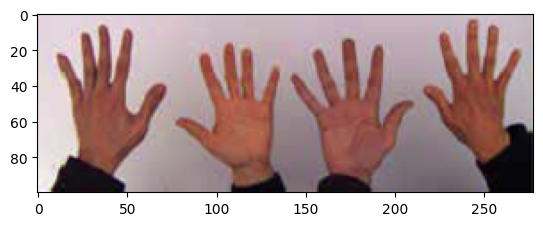

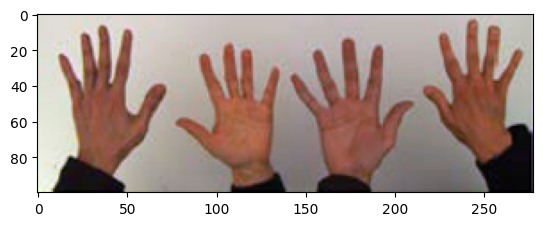

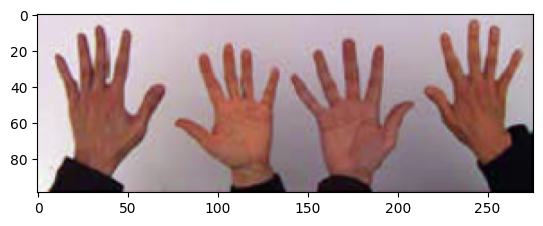

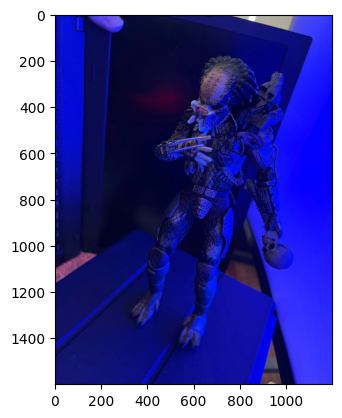

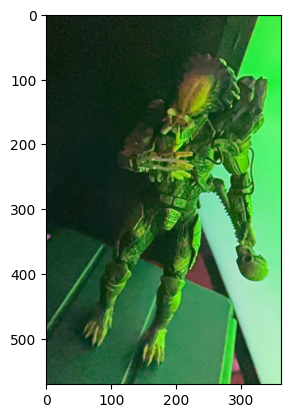

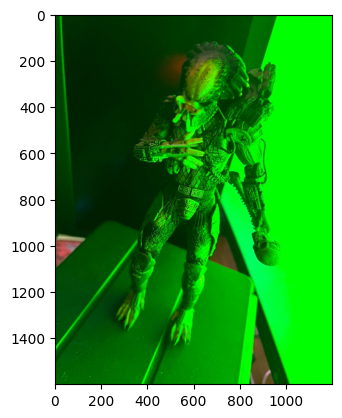

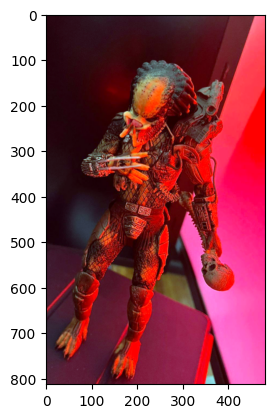

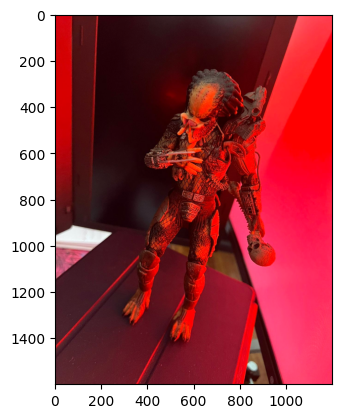

In [5]:
base_path = 'assets\white_patch'
white_patch_image_names = ['test_blue.png', 'test_green.png', 'test_red.png', 'wp_blue.jpg', 'wp_green.png', 'wp_green2.jpg', 'wp_red.png', 'wp_red2.jpg']

images = [cv.imread(f"{base_path}\{path}") for path in white_patch_image_names]
plt.figure()

for image in images:
    img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    balanced_img = white_patch(img_rgb)
    plt.imshow(balanced_img)
    plt.show()

## Parte 2

### Ejercicio 1

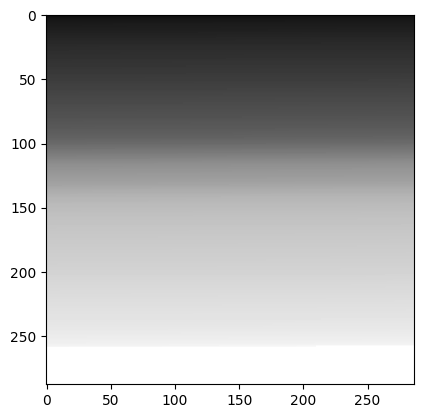

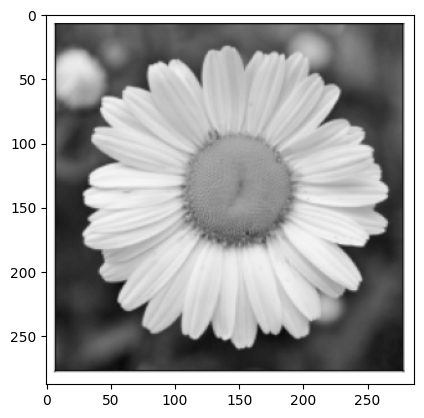

In [6]:
image_paths = ['assets\img1_tp.png','assets\img2_tp.png']

images = [cv.imread(path, cv.IMREAD_GRAYSCALE) for path in image_paths]
plt.figure()

for image in images:
    plt.imshow(image, cmap='gray')
    plt.show()

### Ejercicio 2

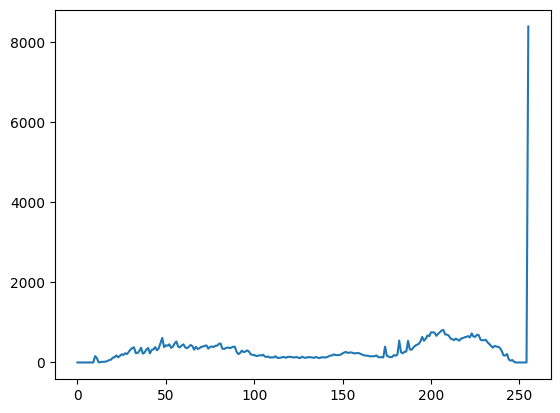

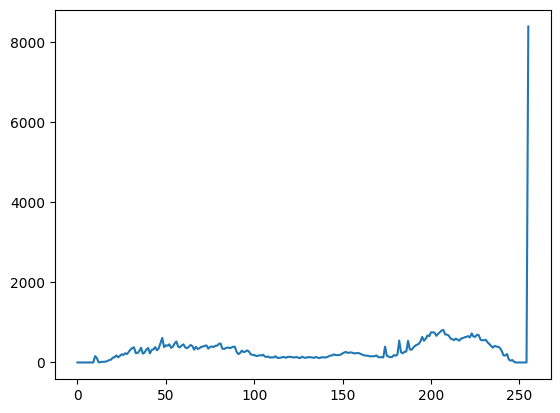

In [22]:
plt.figure()

for image in images:
    hist = cv.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.show()

Se observa que ambos histogramas son iguales (tomando 256 bins) para las dos imagenes. Ambas imagenes tienen un rango dinamico mas o menos uniforme y la mayor cantidad de pixeles en el maximo de intensidad (valores con intensidad 255). En este caso se puede decir que a pesar de que se tengan imagenes distintas, los histogramas pueden ser iguales o muy similares, con lo cual no es una buena herramienta como input (feature) para entrenar un modelo de clasificación/detección de imágenes.

### Ejercicio 3

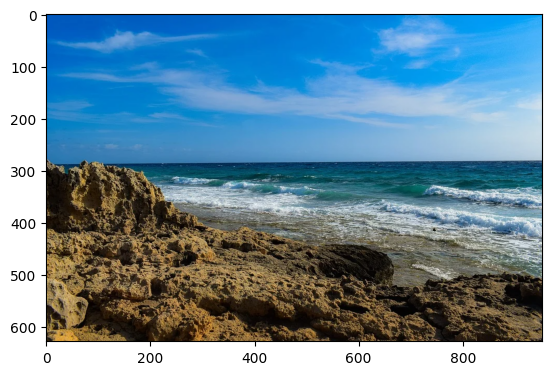

In [8]:
image = cv.imread('assets\\segmentacion.png')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(image_rgb)
plt.show()

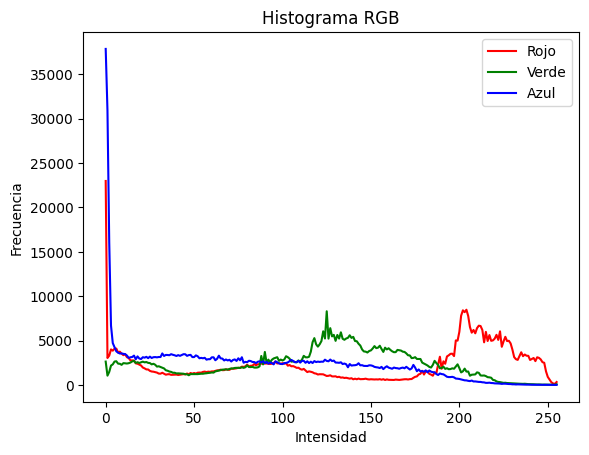

In [9]:
# Separar los canales de color
canal_rojo = image[:,:,0]
canal_verde = image[:,:,1]
canal_azul = image[:,:,2]

# Calcular histogramas para cada canal de color
hist_rojo = cv.calcHist([canal_rojo], [0], None, [256], [0, 256])
hist_verde = cv.calcHist([canal_verde], [0], None, [256], [0, 256])
hist_azul = cv.calcHist([canal_azul], [0], None, [256], [0, 256])

# Graficar los histogramas
plt.figure()
plt.title('Histograma RGB')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.plot(hist_rojo, color='red', label='Rojo')
plt.plot(hist_verde, color='green', label='Verde')
plt.plot(hist_azul, color='blue', label='Azul')
plt.legend()
plt.show()

Opcion 1: Tomamos una muestra de la imagen, creamos un descriptor estadistico y segmentamos los elementos

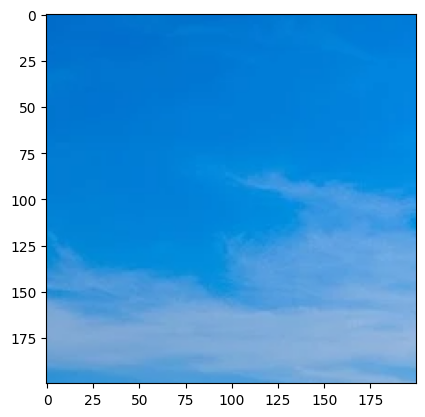

In [10]:
# Tomamos una muestra del cielo, grande y aproximadamente en el centro
img_muestra_clielo = image_rgb[0:200, 400:600,:]
plt.figure(2)
plt.imshow(img_muestra_clielo)
plt.show()

In [11]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
color_mean_cielo, color_std = cv.meanStdDev(img_muestra_clielo)
print(color_mean_cielo.flatten().tolist())
print(color_std.flatten().tolist())

[39.564275, 141.4105, 217.190875]
[50.34478194137279, 19.4476731191677, 6.192555347703783]


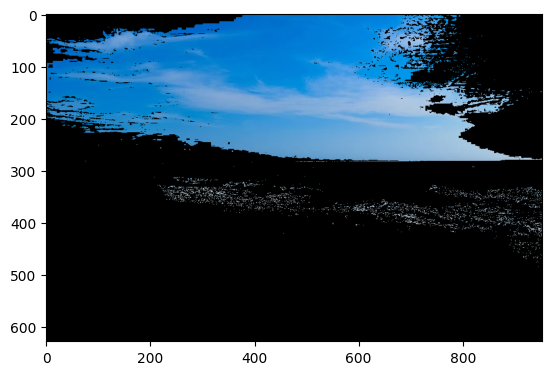

<function matplotlib.pyplot.show(close=None, block=None)>

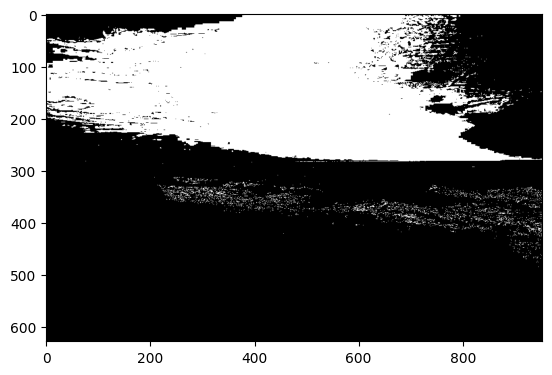

In [12]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 3
mask_cielo = cv.inRange(image_rgb, color_mean_cielo-color_std * n_sigma,  color_mean_cielo+color_std * n_sigma)
img_segmentada = cv.bitwise_and(image_rgb, image_rgb, mask=mask_cielo)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask_cielo,cmap='gray')
plt.show

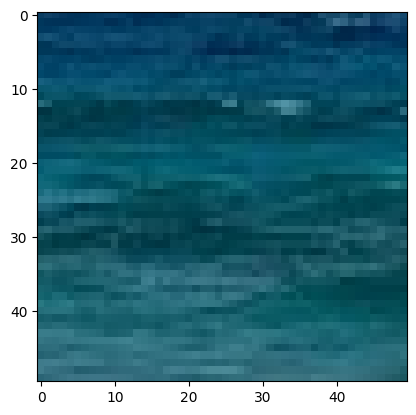

In [13]:
# Tomamos una muestra del mar
img_muestra_mar = image_rgb[290:340, 600:650,:]
plt.figure(2)
plt.imshow(img_muestra_mar)
plt.show()

In [14]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
color_mean_mar, color_std = cv.meanStdDev(img_muestra_mar)
print(color_mean_mar.flatten().tolist())
print(color_std.flatten().tolist())

[16.8492, 84.1412, 102.8216]
[17.49999026742587, 18.843217945987917, 16.897862984413116]


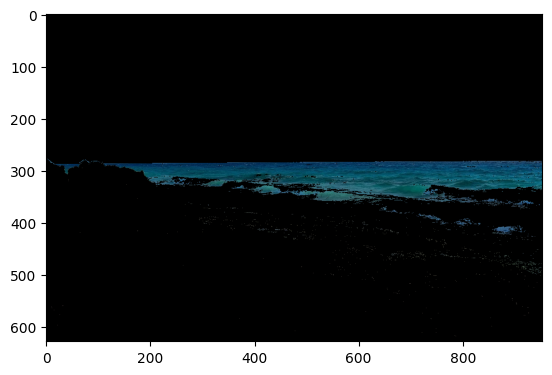

<function matplotlib.pyplot.show(close=None, block=None)>

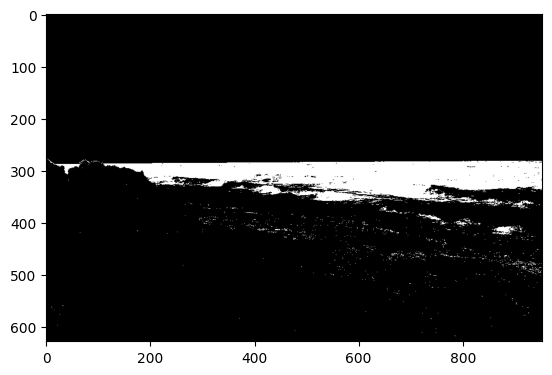

In [15]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 3
mask_mar = cv.inRange(image_rgb, color_mean_mar-color_std * n_sigma,  color_mean_mar+color_std * n_sigma)
img_segmentada = cv.bitwise_and(image_rgb, image_rgb, mask=mask_mar)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask_mar,cmap='gray')
plt.show

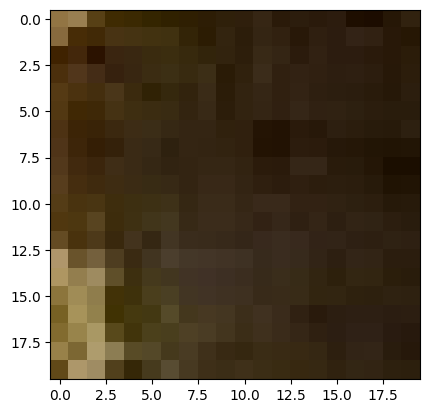

In [16]:
# Tomamos una muestra del suelo
img_muestra_mar = image_rgb[350:370, 70:90,:]
plt.figure(2)
plt.imshow(img_muestra_mar)
plt.show()

In [17]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
color_mean_mar, color_std = cv.meanStdDev(img_muestra_mar)
print(color_mean_mar.flatten().tolist())
print(color_std.flatten().tolist())

[60.2425, 44.35, 21.68]
[25.735358823027894, 24.12566061271691, 17.171418112666174]


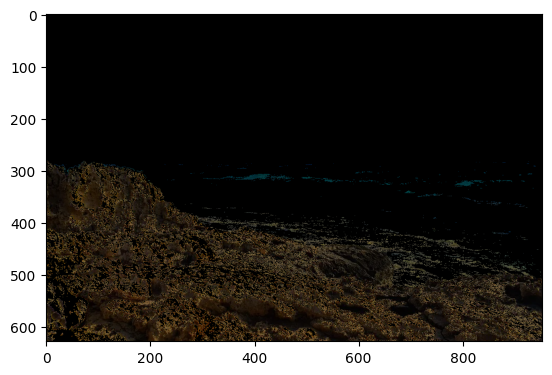

<function matplotlib.pyplot.show(close=None, block=None)>

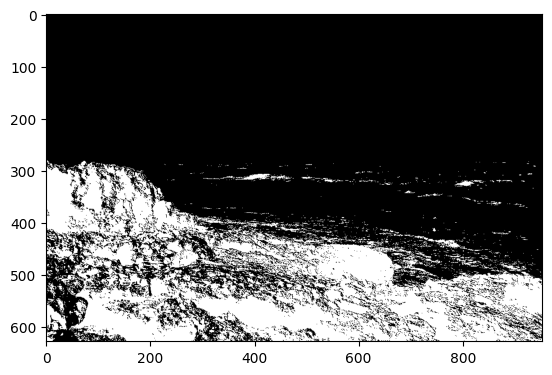

In [18]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 3
mask_mar = cv.inRange(image_rgb, color_mean_mar-color_std * n_sigma,  color_mean_mar+color_std * n_sigma)
img_segmentada = cv.bitwise_and(image_rgb, image_rgb, mask=mask_mar)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask_mar,cmap='gray')
plt.show

Opcion 2: Segmentar en base a la distribución de los colores en HSV

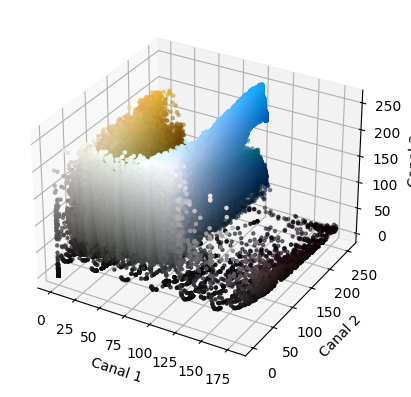

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

image = cv.imread('assets\\segmentacion.png')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

img_HSV = cv.cvtColor(image, cv.COLOR_BGR2HSV)
c1, c2, c3 = cv.split(img_HSV)
# c1, c2, c3 = cv.split(image_rgb)


fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = image_rgb.reshape((np.shape(image_rgb)[0]*np.shape(image_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

Vemos que la distribuciones de colores para RGB son distribuciones no parametricas y que se superponen. Al graficar las distribuciones para la imgen HSV, podemos ver con mayor claridad las distribuciones y segmentar en base al Hue.

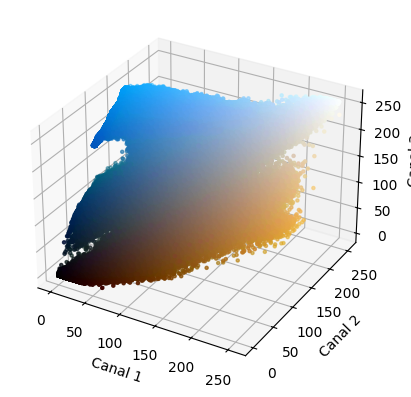

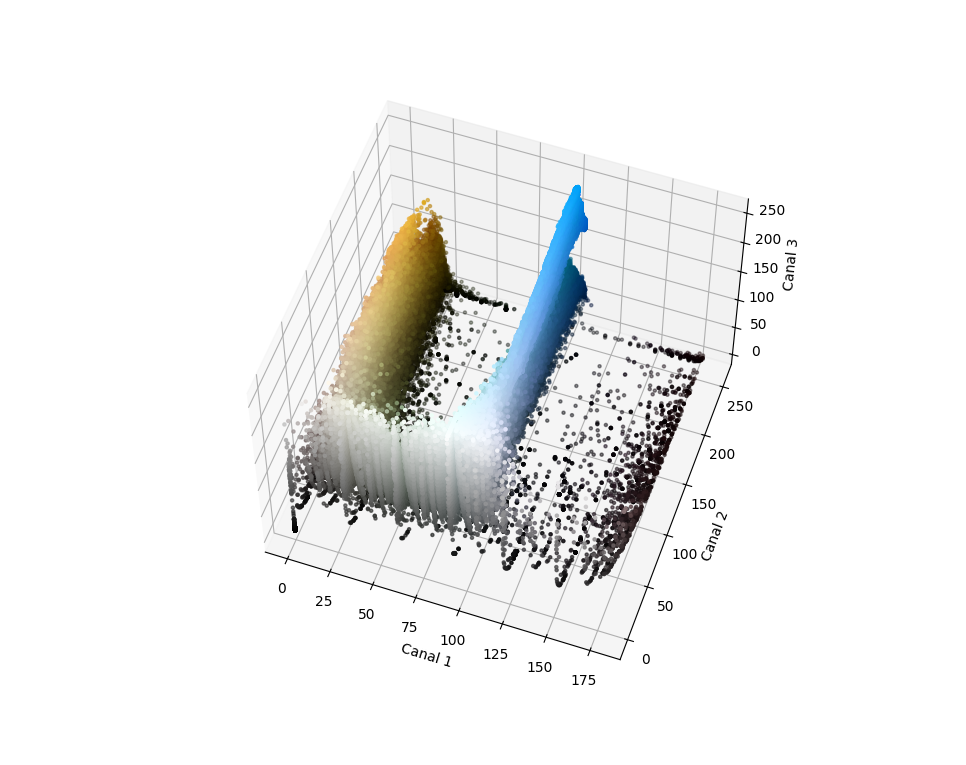

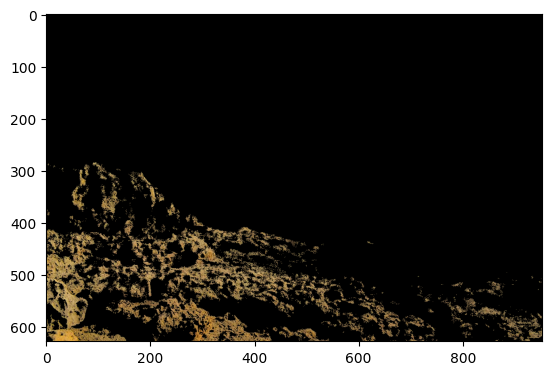

In [20]:
color_l = (0, 100, 100)
color_u = (50, 255, 255)

mask = cv.inRange(img_HSV, color_l, color_u)
img_segmentada = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

plt.figure()
plt.imshow(img_segmentada)
plt.show()

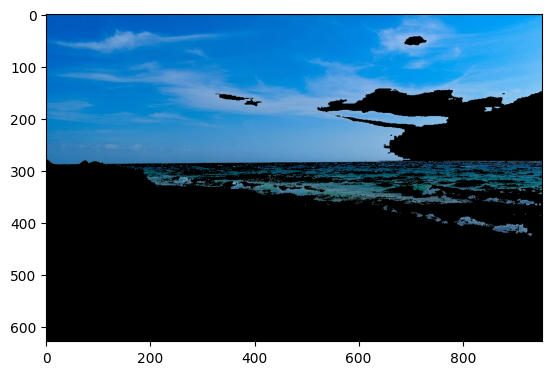

In [21]:
color_l = (50, 100, 100)
color_u = (175, 255, 255)

mask = cv.inRange(img_HSV, color_l, color_u)
img_segmentada = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

plt.figure()
plt.imshow(img_segmentada)
plt.show()

Si bien vemos una segmentacion un poco mejor respecto a segmentar a traves de un estadistico de una muestra, no conseguimos separar correctamente el cielo del mar, ya que tienen valores de Hue muy similares.